<a href="https://colab.research.google.com/github/ikyath/CardioVascularDiseaseDetection/blob/master/Cardiovascular_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pwd


In [0]:
import pandas as pd

In [0]:
ls

In [0]:
cd /content/drive/My\ Drive/Data\ Science/Hackathon

In [0]:
train = pd.read_csv('cardio_train.csv',sep=';')

In [0]:
train.head()

In [0]:
train.shape

In [0]:
train.info()

In [0]:
train.cholesterol.unique()

In [0]:
train.gluc.unique()

In [0]:
train.smoke.unique()

In [0]:
train.alco.unique()

In [0]:
train.active.unique()

In [0]:
train.cardio.unique()

In [50]:
train.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


 Number of Patients

In [51]:
train.shape[0]

69301

 Check for any duplicate entries of patients based on id

In [56]:
(train['id'].value_counts()>=2).sum()

0

In [57]:
train.gender.value_counts()

1    45079
2    24222
Name: gender, dtype: int64

In [59]:
train.cholesterol.value_counts()

1    51868
2     9446
3     7987
Name: cholesterol, dtype: int64

In [61]:
train.gluc.value_counts()

1    58885
3     5277
2     5139
Name: gluc, dtype: int64

In [62]:
train.smoke.value_counts()

0    63199
1     6102
Name: smoke, dtype: int64

In [63]:
train.alco.value_counts()

0    65567
1     3734
Name: alco, dtype: int64

In [64]:
train.active.value_counts()

1    55717
0    13584
Name: active, dtype: int64

The dataset to be classified as target variable is balanced.

In [65]:
train.cardio.value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
features=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']

In [0]:
features_vif=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active','cardio']

In [0]:
scaler = StandardScaler().fit(train[features])
df_rescaled = scaler.transform(train[features])

X_train, X_test, y_train, y_test = train_test_split(train[features], train['cardio'], test_size=0.33, random_state=42)

In [0]:
import statsmodels.api as sm

In [0]:
logml = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())


In [82]:
logml.fit().summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
/usr/local/lib/python3.6/dist-packages/statsmodels/ge

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 cardio   No. Observations:                46431
Model:                            GLM   Df Residuals:                    46419
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 11 May 2020   Deviance:                          nan
Time:                        00:49:06   Pearson chi2:                 1.00e+16
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.8973      0.265    -33.513      0.000      -9.418      -8.377
age             0.0001   4.39e-06     34.009      0.000       0.000       0.000
gender         -0.0019      0.026     -0.073      0.942      -0.053       0.049
height         -0.0052      0.002     -3.429      0.001      -0.008      -0.002
weight          0.0154      0.001     18.772      0.000       0.014       0.017
ap_hi           0.0418      0.001     54.582      0.000       0.040       0.043
ap_lo           0.0006      0.000      4.735      0.000       0.000       0.001
cholesterol     0.5253      0.019     28.367      0.000       0.489       0.562
gluc           -0.1264      0.021     -6.007      0.000      -0.168      -0.085
smoke          -0.1223      0.041     -2.978      0.003      -0.203      -0.042
alco           -0.2043      0.050     -4.097      0.000      -0.302      -0.107
active         -0.2063      0.026     -7.970      0.000      -0.257      -0.156
===============================================================================
"""

In [0]:
def vif_cal(input_data,dependent_col):
    vif_df=pd.DataFrame( columns = ['Var','Vif'])
    x_vars=input_data.drop([dependent_col],axis=1)
    xvar_names = x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-rsq),2)
        vif_df.loc[i]=[xvar_names[i],vif]
    return vif_df.sort_values(by='Vif', axis=0, ascending=False,inplace=False)

In [85]:
vif_cal(input_data=train[features_vif],dependent_col="cardio")

,Var,Vif
2,height,97.50
0,age,55.66
3,weight,31.14
1,gender,11.75
7,gluc,7.04
6,cholesterol,6.53
10,active,5.06
4,ap_hi,1.70
8,smoke,1.37
5,ap_lo,1.26


In [0]:
from sklearn import metrics

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

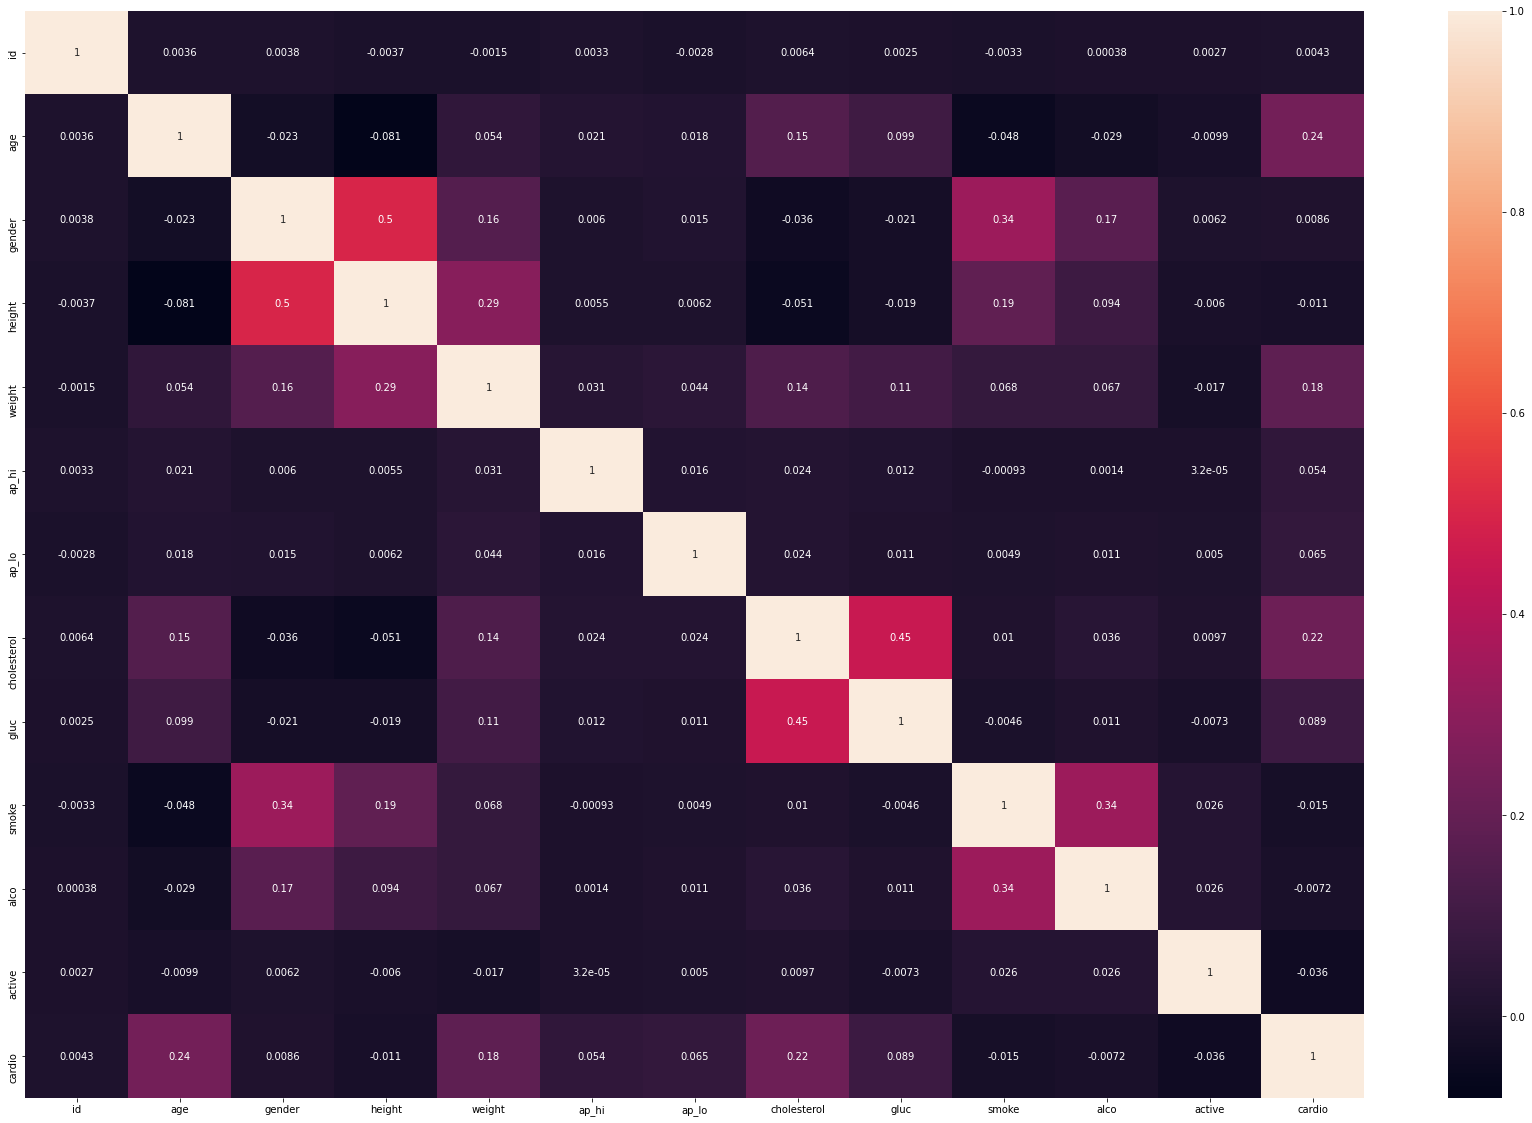

In [88]:
plt.figure(figsize=(30,20))
sns.heatmap(train.corr(),annot=True)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

In [0]:
logreg = LogisticRegression()


In [95]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_log = logreg.predict(X_test)

In [100]:
print(accuracy_score(y_test,y_pred_log))

0.6976388281591605


In [102]:
confusion_matrix(y_test,y_pred_log)

array([[8334, 3044],
       [3871, 7621]])

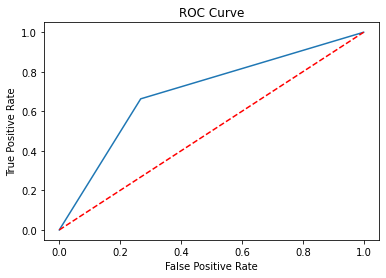

In [103]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_log)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC Curve')
plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier 

In [0]:
RFModel = RandomForestClassifier()

In [106]:
RFModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_rf = RFModel.predict(X_test)

In [108]:
accuracy_score(y_test,y_pred_rf)

0.7177087888062964